In [1]:
# Packages to run the code


import sympy as sp

## Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import fsolve


from scipy.stats import binom

from scipy.integrate import quad

## Calculations
import numpy as np

from IPython.display import display
sp.init_printing()
%matplotlib notebook

In [57]:
def r1(s):
    return R*np.sin(s)+s
def r2(s):
    return R*np.cos(s)+s
def r3(s):
    return R*np.cos(s)+s
def fun(s,v):
    return r1(s)+np.cos(v)

<IPython.core.display.Javascript object>


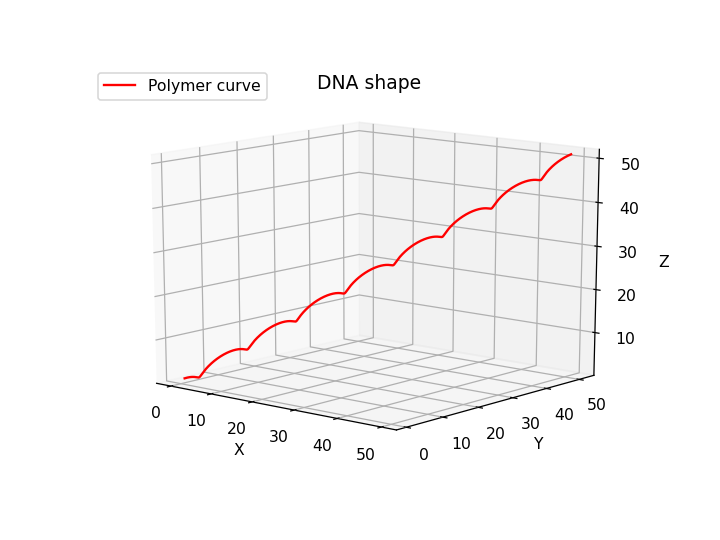

In [58]:
x = np.linspace(0,50,1000)
y = np.linspace(0,2*np.pi,1000)

R = 1
l = 0.25

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
#ax.grid(False)
#ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=6)
plt.locator_params(axis='z', nbins=6)



ax.plot3D(r1(x), r2(x), r3(x), label = 'Polymer curve', color = 'red')

plt.title('DNA shape')

plt.legend(loc = 'upper left')
#ax.set_zlim(-1,1)


plt.show()

<IPython.core.display.Javascript object>


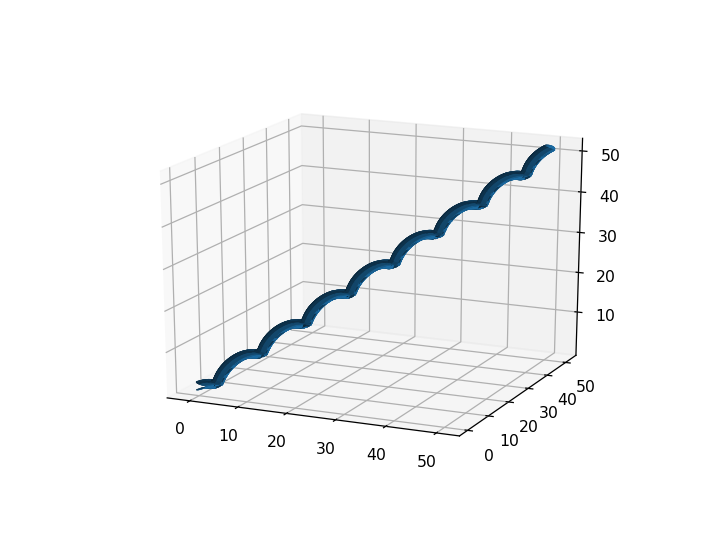

In [60]:
# Generate torus mesh
x = np.linspace(0,50,1000)
y = np.linspace(0,2*np.pi,1000)

x2,y2 = np.meshgrid(x,y)
l = 1

X = r1(x2)+l*np.cos(2*np.pi*y2)
Y = r2(x2)+l*np.sin(2*np.pi*y2)
Z = r3(x2)+l*np.sin(np.pi*y2)

# Display the mesh
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot_surface(X, Y, Z)
plt.show()

In [44]:
display(X)
display(Y)
display(Z)

array([ 1.        ,  1.04924842,  1.09681131,  1.14256732,  1.18639819,
        1.22818901,  1.26782852,  1.30520941,  1.34022859,  1.37278748,
        1.40279224,  1.43015407,  1.45478942,  1.47662024,  1.49557417,
        1.5115848 ,  1.52459182,  1.53454125,  1.54138554,  1.54508379,
        1.54560187,  1.5429125 ,  1.53699544,  1.52783752,  1.51543274,
        1.49978233,  1.48089477,  1.45878587,  1.43347872,  1.40500373,
        1.37339855,  1.33870811,  1.30098448,  1.26028683,  1.21668135,
        1.17024112,  1.12104597,  1.06918238,  1.01474328,  0.95782789,
        0.89854155,  0.83699546,  0.77330653,  0.70759709,  0.63999467,
        0.5706317 ,  0.49964532,  0.42717699,  0.35337226,  0.27838046,
        0.20235433,  0.12544975,  0.04782538, -0.0303577 , -0.10893629,
       -0.18774551, -0.26661909, -0.34538976, -0.42388963, -0.50195058,
       -0.57940458, -0.65608414, -0.73182263, -0.8064547 , -0.87981661,
       -0.95174666, -1.02208552, -1.09067659, -1.1573664 , -1.22

array([ 1.00000000e+00,  1.02825628e+00,  1.03420131e+00,  1.01852737e+00,
        9.82410624e-01,  9.27483402e-01,  8.55796167e-01,  7.69770114e-01,
        6.72141416e-01,  5.65898410e-01,  4.54213109e-01,  3.40368610e-01,
        2.27684008e-01,  1.19438525e-01,  1.87965601e-02, -7.12646558e-02,
       -1.48023171e-01, -2.09074649e-01, -2.52387528e-01, -2.76349766e-01,
       -2.79806112e-01, -2.62085061e-01, -2.23014894e-01, -1.62928433e-01,
       -8.26564046e-02,  1.64904407e-02,  1.32750048e-01,  2.63947980e-01,
        4.07545654e-01,  5.60696822e-01,  7.20311023e-01,  8.83122562e-01,
        1.04576350e+00,  1.20483896e+00,  1.35700313e+00,  1.49903418e+00,
        1.62790644e+00,  1.74085822e+00,  1.83545375e+00,  1.90963783e+00,
        1.96178192e+00,  1.99072078e+00,  1.99577866e+00,  1.97678452e+00,
        1.93407600e+00,  1.86849193e+00,  1.78135370e+00,  1.67443569e+00,
        1.54992570e+00,  1.41037601e+00,  1.25864639e+00,  1.09784012e+00,
        9.31234694e-01,  

array([ 1.00000000e+00,  1.03450182e+00,  1.05898040e+00,  1.07352399e+00,
        1.07831928e+00,  1.07364898e+00,  1.05988849e+00,  1.03750164e+00,
        1.00703552e+00,  9.69114483e-01,  9.24433449e-01,  8.73750402e-01,
        8.17878340e-01,  7.57676657e-01,  6.94042068e-01,  6.27899172e-01,
        5.60190746e-01,  4.91867873e-01,  4.23879986e-01,  3.57164954e-01,
        2.92639287e-01,  2.31188575e-01,  1.73658246e-01,  1.20844742e-01,
        7.34872039e-02,  3.22597381e-02, -2.23564025e-03, -2.94753319e-02,
       -4.90196739e-02, -6.05176016e-02, -6.37104062e-02, -5.84345494e-02,
       -4.46235056e-02, -2.23086145e-02,  8.38106558e-03,  4.72199025e-02,
        9.38878218e-02,  1.47973404e-01,  2.08977917e-01,  2.76320239e-01,
        3.49342637e-01,  4.27317320e-01,  5.09453721e-01,  5.94906431e-01,
        6.82783696e-01,  7.72156401e-01,  8.62067453e-01,  9.51541455e-01,
        1.03959459e+00,  1.12524462e+00,  1.20752085e+00,  1.28547405e+00,
        1.35818614e+00,  